# <font color = 'blue'>Drug Discovery Using ML and EDA</font> 

#### <b> Predicting Bioactivity towards inhibiting the <font color = 'red'>Acetylcholinesterase</font> enzyme - A drug target for Alzheimer's Disease </b> 

- ##### <b>One Line Summary of Project</b> - To Study <font color='red'>Drug-Protein Interaction</font> Based on their <font color ='blue'>Fingerprints</font> 


- When the brain's structures begin to shrink, it can no longer efficiently produce the ACh chemical needed for intra-neuronal messaging — and the receptors responsible for catching these chemicals to process the signal are also less plentiful. Although both of these components begin to fail simultaneously, the decline in the number of receptors to catch these ACh molecules is much more significant than the reduced chemical production.

- At this stage, although there no treatments can reverse the process of destruction, there are options to promote a strong signaling pathway for as long as possible. 

- This is the goal of an <b>Acetylcholinesterase inhibitor</b>. It works by blocking an enzyme, acetylcholinesterase, from attaching to the ACh chemical and digesting it. By allowing the chemical to have more time to bind to a receptor, there is more of a chance for a message to be sent from one neuron to another and allow the body to have coordinated movements and functioning.

<hr>

# <b>The Ultimate Aim that I want to achieve</b>
- <b> To study the Chemical Structure [ here - canonical_smiles ] of Compounds inhibiting Human AChE enzyme with the help of  <font color = 'red'>Lipinski Descriptors</font></b>

- <b> To Study the Relantionship between <font color = 'red'> Molecular Fingerprints Descriptor</font> and <font color = 'blue'>Molar Concentration</font> [IC50] value of the Compound, inhibiting the Human AChE enzyme</b>

- <b> On the basis of Insights from the relationship [ be it weak or Strong, in both cases it will provide us with some insights ], Building a Model and a Web App which will predict the Bioactivity [ IC50 ] of the Compound</b>

<hr>
 
 ### <b>The Problem Statement</b>
 
- Fingerprints Holds an Important Place in the field of Bioinformatics and Genomics. They are Quantative Arrangement of Structures on the basis of some rules and Algorithms, Explaining certain properties in that manner . They Holds an important place in drug biology and are important in explaining bioacitivity of many different types of compounds but now a question arises within me which is, 

- <b>Are they significant in explaining bioactivity of Compounds inhibiting Human AChE enzyme?</b>

- Fingerprints are arrnagement of bits on the basis of Division of Chemical Structure of Compounds so Logically they should not be Major Contributors in explaining the Variations in IC50 values [ Molar Concentration ] of inhibiting Human AChE Enzyme 

- <i>They Do contribute but the curosity is, are they the Major Contributors or we should look for another ones when it comes to inhibiting Human AChE Enzyme</i> 

- So this is what we are Trying to Study, the relationship between Fingerprints and Bioactivity [IC50] of Compounds, inhibiting the Human AChE enzyme 

- I wish to achieve this Relationship with the Help of the concept of Hypothesis Testing , here 

- <b>Alternative Hypothesis [Ha]</b> - Fingerprints are not Major Contributors in explaining the Variations in IC50 values inhibiting the Human AChE Enzyme
- <b>Null Hypothesis [H0]</b> - Fingerprints are Major Contributors in explaining the Variations in IC50 values inhibiting the Human AChE Enzyme [ this is what I wish to disprove ] 

<hr>

#### <b> Concept Used </b>
- Exploratory Data Analysis 
- Regression Concept of Machine Learning [<b> Regression Analysis </b> ]
- Streamlit for building the Web App

<hr>

#### <b> What I Wish to Achieve ?</b>
##### <b> <font color = 'blue'>A low R square value .. But Why ?</font> </b>
R square value in regression analysis tells us about how much variation in dependent / Target variable can be explained by Independent variables 

A Relatively low value would suggest that even though the features are significant they are not able to explain the variation, which will support my cause and will result into rejecting null hypothesis

Will i get that Value? Let's Find Out 
<hr>

## ChEMBL Database

The <a href = "https://www.ebi.ac.uk/chembl/" > ChEMBL Database </a> is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications


<hr>

### Installing Libraries 

Installing ChEMBL web service Package to Extract bioactivity data from the ChEMBL Database

In [3]:
# ! pip install chembl_webresource_client

In [2]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import math
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

In [4]:
import warnings
warnings.filterwarnings('ignore')

#### Search For Target Protein 

##### Target Search for Acetylcholinesterase

In [155]:
target = new_client.target
target_query = target.search('Acetylcholinesterase')
target_query # Dictionary 

[{'cross_references': [{'xref_id': 'P22303', 'xref_name': None, 'xref_src': 'canSAR-Target'}, {'xref_id': 'Acetylcholinesterase', 'xref_name': None, 'xref_src': 'Wikipedia'}, {'xref_id': 'NBK23068', 'xref_name': 'Acetylcholinesterase (AChE)', 'xref_src': 'MICAD'}, {'xref_id': 'NBK23629', 'xref_name': 'Acetylcholinesterase (AChE)', 'xref_src': 'MICAD'}], 'organism': 'Homo sapiens', 'pref_name': 'Acetylcholinesterase', 'score': 27.0, 'species_group_flag': False, 'target_chembl_id': 'CHEMBL220', 'target_components': [{'accession': 'P22303', 'component_description': 'Acetylcholinesterase', 'component_id': 357, 'component_type': 'PROTEIN', 'relationship': 'SINGLE PROTEIN', 'target_component_synonyms': [{'component_synonym': 'ACHE', 'syn_type': 'GENE_SYMBOL'}, {'component_synonym': 'Acetylcholinesterase', 'syn_type': 'UNIPROT'}, {'component_synonym': 'AChE', 'syn_type': 'UNIPROT'}, {'component_synonym': '3.1.1.7', 'syn_type': 'EC_NUMBER'}], 'target_component_xrefs': [{'xref_id': 'ACHE', 'xre

In [156]:
targets = pd.DataFrame(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,27.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
4,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
5,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
6,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
7,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913
8,[],Anopheles gambiae,Acetylcholinesterase,15.0,False,CHEMBL2046266,"[{'accession': 'Q869C3', 'component_descriptio...",SINGLE PROTEIN,7165
9,[],Bemisia tabaci,AChE2,15.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038


In [157]:
targets.columns

Index(['cross_references', 'organism', 'pref_name', 'score',
       'species_group_flag', 'target_chembl_id', 'target_components',
       'target_type', 'tax_id'],
      dtype='object')

In [158]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cross_references    24 non-null     object 
 1   organism            24 non-null     object 
 2   pref_name           24 non-null     object 
 3   score               24 non-null     float64
 4   species_group_flag  24 non-null     bool   
 5   target_chembl_id    24 non-null     object 
 6   target_components   24 non-null     object 
 7   target_type         24 non-null     object 
 8   tax_id              24 non-null     int64  
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 1.6+ KB


### Out target is to Work / Predict for Human Acetylcholinesterase 

##### Retrieve chembl id for Human Acetylcholinesterase

In [159]:
filt = (targets.organism == 'Homo sapiens') & (targets.pref_name == 'Acetylcholinesterase')
targets[filt]

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606


In [160]:
selected_target = targets[filt]['target_chembl_id'][0]
selected_target

'CHEMBL220'

<img src = '#_ID.jpg' width="750" height="750">

## Potency 

- <b>In the field of pharmacology, potency is a measure of drug activity expressed in terms of the amount required to produce an  effect of given intensity</b>

- <b>A highly potent drug (e.g., fentanyl, alprazolam, risperidone, bumetanide, bisoprolol) evokes a given response at low concentrations, while a drug of lower potency (meperidine, diazepam, ziprasidone, furosemide, metoprolol) evokes the same response only at higher concentrations</b>

## IC50

- <b>The half maximal inhibitory concentration (IC50) is a measure of the potency of a substance in inhibiting a specific biological or biochemical function. IC50 is a quantitative measure that indicates how much of a particular inhibitory substance (e.g. drug) is needed to inhibit, in vitro, a given biological process or biological component by 50%</b>

- <b>The biological component could be an enzyme, cell, cell receptor or microorganism. IC50 values are typically expressed as molar concentration.</b>

In [161]:
activity = new_client.activity
res = activity.filter(target_chembl_id = selected_target).filter(standard_types="IC50")
res

[{'activity_comment': None, 'activity_id': 33969, 'activity_properties': [], 'assay_chembl_id': 'CHEMBL643384', 'assay_description': 'Inhibitory concentration against acetylcholinesterase', 'assay_type': 'B', 'assay_variant_accession': None, 'assay_variant_mutation': None, 'bao_endpoint': 'BAO_0000190', 'bao_format': 'BAO_0000357', 'bao_label': 'single protein format', 'canonical_smiles': 'CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1', 'data_validity_comment': None, 'data_validity_description': None, 'document_chembl_id': 'CHEMBL1148382', 'document_journal': 'J. Med. Chem.', 'document_year': 2004, 'ligand_efficiency': {'bei': '19.61', 'le': '0.36', 'lle': '3.32', 'sei': '9.21'}, 'molecule_chembl_id': 'CHEMBL133897', 'molecule_pref_name': None, 'parent_molecule_chembl_id': 'CHEMBL133897', 'pchembl_value': '6.12', 'potential_duplicate': 0, 'qudt_units': 'http://www.openphacts.org/units/Nanomolar', 'record_id': 252547, 'relation': '=', 'src_id': 1, 'standard_flag': 1, 'standard_relation': '=', '

In [162]:
df = pd.DataFrame(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15537,None,23106319,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4511474,Acetylcholinesterase (h) Eurofins-Cerep enzyme...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,% Inhibition of Control Values (Mean n=2),%,None,None,11.0
15538,None,23107435,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4511555,Acetylcholinesterase (h) Eurofins-Cerep enzyme...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,% Inhibition of Control Values (Mean n=2),%,None,None,7.1
15539,None,23107519,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4511555,Acetylcholinesterase (h) Eurofins-Cerep enzyme...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,% Inhibition of Control Values (Mean n=2),%,None,None,14.5
15540,Not Active,23118491,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4800755,ACHOLINEST Eurofins SafetyScreen44 (BI),B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,% Ctrl,%,None,None,87.0


In [163]:
test = df[['standard_value', 'standard_type', 'standard_units', 'type', 'units']]
filt = df['standard_type'] == 'IC50' 
df = df[filt]
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15447,None,22970946,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4770653,Inhibition of AChE (unknown origin) preincubat...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,None,None,0.25
15448,None,22970947,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4770653,Inhibition of AChE (unknown origin) preincubat...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,None,None,0.03
15516,None,22986924,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4774393,Inhibition of human erythrocytes AChE using ac...,B,None,None,BAO_0000179,BAO_0000019,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,None,None,28.98
15517,None,22986925,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4774393,Inhibition of human erythrocytes AChE using ac...,B,None,None,BAO_0000179,BAO_0000019,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,None,None,0.0064


In [62]:
df.to_csv("AChE_Bioactivity_data_1.csv", index=False)

In [63]:
df.shape

(8205, 45)

In [64]:
df.columns # standard_value = Potency [ Lower is Better ] 

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8205 entries, 0 to 15518
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activity_comment           1312 non-null   object 
 1   activity_id                8205 non-null   int64  
 2   activity_properties        8205 non-null   object 
 3   assay_chembl_id            8205 non-null   object 
 4   assay_description          8205 non-null   object 
 5   assay_type                 8205 non-null   object 
 6   assay_variant_accession    0 non-null      object 
 7   assay_variant_mutation     0 non-null      object 
 8   bao_endpoint               8205 non-null   object 
 9   bao_format                 8205 non-null   object 
 10  bao_label                  8205 non-null   object 
 11  canonical_smiles           8170 non-null   object 
 12  data_validity_comment      603 non-null    object 
 13  data_validity_description  603 non-null    obje

#### Percentage of Missing Values

In [66]:
( df.isnull().sum() / df.shape[0] ) *100

activity_comment              84.009750
activity_id                    0.000000
activity_properties            0.000000
assay_chembl_id                0.000000
assay_description              0.000000
assay_type                     0.000000
assay_variant_accession      100.000000
assay_variant_mutation       100.000000
bao_endpoint                   0.000000
bao_format                     0.000000
bao_label                      0.000000
canonical_smiles               0.426569
data_validity_comment         92.650823
data_validity_description     92.650823
document_chembl_id             0.000000
document_journal              11.383303
document_year                 10.615478
ligand_efficiency             30.457038
molecule_chembl_id             0.000000
molecule_pref_name            78.427788
parent_molecule_chembl_id      0.000000
pchembl_value                 29.213894
potential_duplicate            0.000000
qudt_units                    22.778793
record_id                      0.000000


In [67]:
df1 = df.copy()
df1

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15447,None,22970946,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4770653,Inhibition of AChE (unknown origin) preincubat...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,None,None,0.25
15448,None,22970947,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4770653,Inhibition of AChE (unknown origin) preincubat...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,None,None,0.03
15516,None,22986924,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4774393,Inhibition of human erythrocytes AChE using ac...,B,None,None,BAO_0000179,BAO_0000019,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,None,None,28.98
15517,None,22986925,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4774393,Inhibition of human erythrocytes AChE using ac...,B,None,None,BAO_0000179,BAO_0000019,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,None,None,0.0064


### Required Columns are : molecule_chembl_id , canonical_smiles and standard_value
- ##### molecule_chembl_id has no missing values - so we are good to go
- ##### canonical_smiles contains 0.43% of missing values which we can drop easily as replacing values brings variability / variations so droping them is the best option
- ##### standard_value contains 21.74% of missing values which we can drop easily as replacing values brings variability / variations so droping them is the best option

In [68]:
df1.dropna(subset=['canonical_smiles', 'standard_value'], axis=0, inplace=True)
df1.isnull().sum()

activity_comment             6884
activity_id                     0
activity_properties             0
assay_chembl_id                 0
assay_description               0
assay_type                      0
assay_variant_accession      6947
assay_variant_mutation       6947
bao_endpoint                    0
bao_format                      0
bao_label                       0
canonical_smiles                0
data_validity_comment        6352
data_validity_description    6352
document_chembl_id              0
document_journal               93
document_year                  30
ligand_efficiency            1242
molecule_chembl_id              0
molecule_pref_name           6049
parent_molecule_chembl_id       0
pchembl_value                1140
potential_duplicate             0
qudt_units                    613
record_id                       0
relation                        0
src_id                          0
standard_flag                   0
standard_relation               0
standard_text_

In [69]:
df1.shape

(6947, 45)

#### Combining those Required Columns into a new Dataframe

In [70]:
df2 = df1[['molecule_chembl_id','canonical_smiles', 'standard_value']]
df2

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
15447,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,250.0
15448,CHEMBL502,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,30.0
15516,CHEMBL3085398,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,28980.0
15517,CHEMBL253998,CC(C)=CCc1c(O)cc(O)c2c1O[C@H](c1ccccc1)CC2=O,6.4


In [71]:
df2['standard_value'] = df2['standard_value'].astype('float')

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6947 entries, 0 to 15518
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  6947 non-null   object 
 1   canonical_smiles    6947 non-null   object 
 2   standard_value      6947 non-null   float64
dtypes: float64(1), object(2)
memory usage: 217.1+ KB


In [73]:
df2.shape

(6947, 3)

In [74]:
df2.to_csv('AChE_Bioactivity_data_2.csv', index=False)

### Labeling Compounds as either being <b>active</b>, <b>inactive</b> or <b>intermediate</b>

<b>The Bioactivity data is in the IC50 unit. Compounds Having values [Potency] of</b>
- Less than <b>1000nM</b> will be considered as <b>active</b> 
- Greater than <b>10000nM</b> will be considered as <b>inactive</b>
- Between <b>1000nM</b> and <b>10000nM</b> will be considered as <b>intermediate</b>

In [75]:
df3 = pd.read_csv('AChE_Bioactivity_data_2.csv')
df3.shape

(6947, 3)

In [76]:
bioactivity_threshold = []
for i in df3['standard_value']:
    if i >= 10000:
        bioactivity_threshold.append('inactive')
    elif i <= 1000:
        bioactivity_threshold.append('active')
    else:
        bioactivity_threshold.append('intermediate')
len(bioactivity_threshold)

6947

In [77]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
bioactivity_class

0         active
1         active
2       inactive
3         active
4         active
          ...   
6942      active
6943      active
6944    inactive
6945      active
6946      active
Name: class, Length: 6947, dtype: object

In [78]:
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
6942,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,250.0,active
6943,CHEMBL502,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,30.0,active
6944,CHEMBL3085398,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,28980.0,inactive
6945,CHEMBL253998,CC(C)=CCc1c(O)cc(O)c2c1O[C@H](c1ccccc1)CC2=O,6.4,active


In [79]:
df4['class'].value_counts()

active          3341
inactive        2013
intermediate    1593
Name: class, dtype: int64

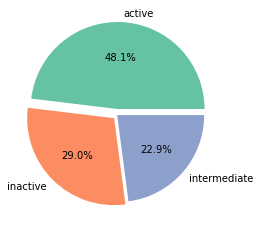

In [80]:
explode = [0.07, 0.05, 0]
palette_color = sns.color_palette('Set2')
plt.pie(df4['class'].value_counts(), labels=['active', 'inactive', 'intermediate'] , colors=palette_color, explode=explode, autopct='%.1f%%')
plt.savefig(r'Graphs\Distribution of classes.jpg')
plt.show()

In [81]:
df4.to_csv('AChE_Bioactivity_data_3.csv', index=False)

<hr>

### Conda and rdkit are required 

<b>rdkit</b> helps in computing molecular descriptors
Here <b>Lipinski Descriptors</b> are Calculated with the help of <b>rdkit</b>

<img src = '#_Conda.jpg' width="600" height="600">

In [82]:
df5 = pd.read_csv('AChE_Bioactivity_data_3.csv')
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
6942,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,250.0,active
6943,CHEMBL502,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,30.0,active
6944,CHEMBL3085398,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,28980.0,inactive
6945,CHEMBL253998,CC(C)=CCc1c(O)cc(O)c2c1O[C@H](c1ccccc1)CC2=O,6.4,active


In [104]:
df5 = df5.drop(columns='canonical_smiles')

In [105]:
smiles = []

for i in df4.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [106]:
df5 = pd.concat([df5,smiles], axis=1)
df5

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
6942,CHEMBL95,250.0,active,Nc1c2c(nc3ccccc13)CCCC2
6943,CHEMBL502,30.0,active,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2
6944,CHEMBL3085398,28980.0,inactive,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...
6945,CHEMBL253998,6.4,active,CC(C)=CCc1c(O)cc(O)c2c1O[C@H](c1ccccc1)CC2=O


### <b>Calculate Lipinski Descriptors</b> 

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the <b>Absorption</b>, <b>Distribution</b>, <b>Metabolism</b> and <b>Excretion</b> <b>(ADME)</b> that is also known as the <b>pharmacokinetic profile</b>. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10


In [107]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [108]:
df_lipinski = lipinski(df5['canonical_smiles'])
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
6942,198.269,2.6958,1.0,2.0
6943,379.500,4.3611,0.0,4.0
6944,424.493,5.1878,4.0,6.0
6945,324.376,4.3130,2.0,4.0


In [109]:
df6 = pd.concat([df5, df_lipinski], axis=1)
df6

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
6942,CHEMBL95,250.0,active,Nc1c2c(nc3ccccc13)CCCC2,198.269,2.6958,1.0,2.0
6943,CHEMBL502,30.0,active,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,379.500,4.3611,0.0,4.0
6944,CHEMBL3085398,28980.0,inactive,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,424.493,5.1878,4.0,6.0
6945,CHEMBL253998,6.4,active,CC(C)=CCc1c(O)cc(O)c2c1O[C@H](c1ccccc1)CC2=O,324.376,4.3130,2.0,4.0


### Converting IC50 to pIC50 

To Reduce Skewness and Variablity in the Data and allowing Data to be uniformly Distributed, I will convert IC50 to pIC50 Value which is basically a negative log -> -log10(IC50) 

- Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10^-9
- Take the molar value and apply -log10
- Delete the standard_value column and create a new pIC50 column

In [110]:
df6['standard_value'].describe()

count    6.947000e+03
mean     1.236072e+13
std      8.549650e+14
min      0.000000e+00
25%      9.000000e+01
50%      1.300000e+03
75%      1.200000e+04
max      7.079458e+16
Name: standard_value, dtype: float64

In [111]:
df6[df6['standard_value']<=0]

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
6736,CHEMBL4780352,0.0,active,COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(OCCCCN[N+]3(C)...,744.909,6.9962,1.0,9.0


##### <b>It is not Possible for IC50 value or concentration to be negative or zero so we can remove them as it is clearly an experimental error<b>


In [112]:
filt = df6['standard_value'] <=0
df7 = df6[~filt]
df7

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
6942,CHEMBL95,250.0,active,Nc1c2c(nc3ccccc13)CCCC2,198.269,2.6958,1.0,2.0
6943,CHEMBL502,30.0,active,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,379.500,4.3611,0.0,4.0
6944,CHEMBL3085398,28980.0,inactive,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,424.493,5.1878,4.0,6.0
6945,CHEMBL253998,6.4,active,CC(C)=CCc1c(O)cc(O)c2c1O[C@H](c1ccccc1)CC2=O,324.376,4.3130,2.0,4.0


In [113]:
df7['standard_value'].describe()

count    6.946000e+03
mean     1.236250e+13
std      8.550266e+14
min      5.000000e-06
25%      9.010000e+01
50%      1.300000e+03
75%      1.200000e+04
max      7.079458e+16
Name: standard_value, dtype: float64

#### <b> Point to be noted</b> 
- Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [114]:
norm =[]
for i in df7.standard_value:
    if i > math.pow(10, 8):
        i = math.pow(10, 8)
    norm.append(i)
df7['standard_norm_value'] = norm
df7.drop('standard_value', axis=1, inplace=True)
df7    

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,standard_norm_value
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,100.0
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,300.0
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,800.0
...,...,...,...,...,...,...,...,...
6942,CHEMBL95,active,Nc1c2c(nc3ccccc13)CCCC2,198.269,2.6958,1.0,2.0,250.0
6943,CHEMBL502,active,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,379.500,4.3611,0.0,4.0,30.0
6944,CHEMBL3085398,inactive,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,424.493,5.1878,4.0,6.0,28980.0
6945,CHEMBL253998,active,CC(C)=CCc1c(O)cc(O)c2c1O[C@H](c1ccccc1)CC2=O,324.376,4.3130,2.0,4.0,6.4


In [115]:
df7['standard_norm_value'].describe()

count    6.946000e+03
mean     2.607000e+05
std      4.111249e+06
min      5.000000e-06
25%      9.010000e+01
50%      1.300000e+03
75%      1.200000e+04
max      1.000000e+08
Name: standard_norm_value, dtype: float64

In [116]:
pIC50=[]
for i in df7.standard_norm_value:
    molar = i*math.pow(10, -9)
    pIC50.append(-np.log10(molar))
df7['pIC50'] = pIC50
df7.drop('standard_norm_value', axis=1, inplace=True)
df7

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6942,CHEMBL95,active,Nc1c2c(nc3ccccc13)CCCC2,198.269,2.6958,1.0,2.0,6.602060
6943,CHEMBL502,active,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,379.500,4.3611,0.0,4.0,7.522879
6944,CHEMBL3085398,inactive,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,424.493,5.1878,4.0,6.0,4.537902
6945,CHEMBL253998,active,CC(C)=CCc1c(O)cc(O)c2c1O[C@H](c1ccccc1)CC2=O,324.376,4.3130,2.0,4.0,8.193820


In [117]:
df7['pIC50'].describe()

count    6946.000000
mean        5.990362
std         1.611970
min         1.000000
25%         4.920819
50%         5.886057
75%         7.045276
max        14.301030
Name: pIC50, dtype: float64

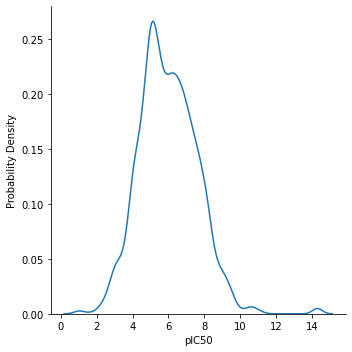

In [118]:
sns.displot(df7.pIC50, kind='kde')
plt.xlabel('pIC50')
plt.ylabel('Probability Density')
plt.plot()
plt.savefig(r'Graphs\Distribution of pIC50.jpg')

In [119]:
df7.to_csv('AChE_Bioactivity_data_4.csv', index=False)

### Removing Intermediate Bioacitvity Class 
<b>To perform Mann whitney U Test</b>

In [120]:
filt = df7['class'] == 'intermediate'
df8 = df7[~filt]
df8

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6942,CHEMBL95,active,Nc1c2c(nc3ccccc13)CCCC2,198.269,2.6958,1.0,2.0,6.602060
6943,CHEMBL502,active,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,379.500,4.3611,0.0,4.0,7.522879
6944,CHEMBL3085398,inactive,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,424.493,5.1878,4.0,6.0,4.537902
6945,CHEMBL253998,active,CC(C)=CCc1c(O)cc(O)c2c1O[C@H](c1ccccc1)CC2=O,324.376,4.3130,2.0,4.0,8.193820


### <b>Exploratory Data Analysis using Lipinski Descriptors</b>

#### Pie Chart plot of 2 Bioactivity Classes

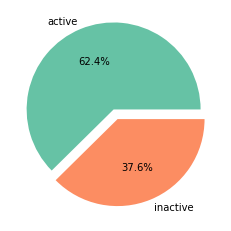

In [121]:
explode = [0.07, 0.05]
palette_color = sns.color_palette('Set2')
plt.pie(df8['class'].value_counts(), labels=['active', 'inactive'] , colors=palette_color, explode=explode, autopct='%.1f%%')
plt.savefig(r'Graphs\Distribution of Active-Inactive_classes.jpg')
plt.show()

#### Frequency Plot of 2 Bioactivity Classes



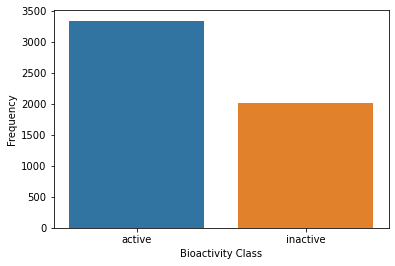

In [122]:
sns.countplot(x='class', data=df8)
plt.xlabel('Bioactivity Class')
plt.ylabel('Frequency')
plt.plot()
plt.savefig(r'Graphs\Frequency Plot of 2 Bioactivity Classes')

#### Scatter plot of MW vs LogP

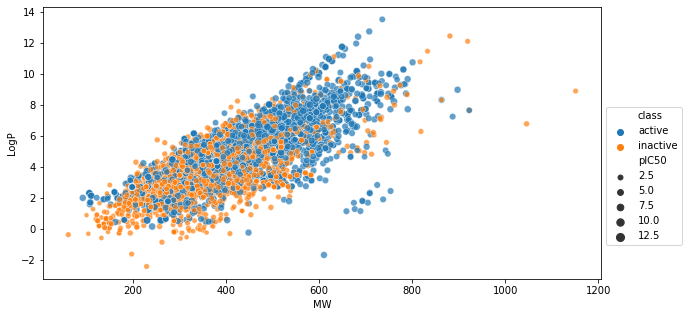

In [123]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x='MW', y='LogP', data=df8, hue='class', size='pIC50', alpha=0.7)
plt.xlabel('MW')
plt.ylabel('LogP')
plt.legend(bbox_to_anchor=(1, 0.65))
plt.savefig(r'Graphs\Scatter-Plot-MW vs LogP.pdf')
plt.show()

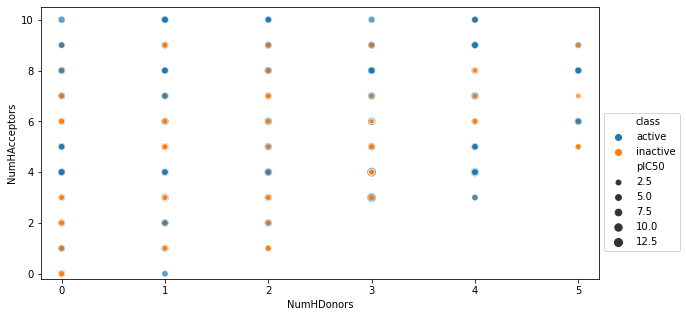

In [124]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x='NumHDonors', y='NumHAcceptors', data=df8, hue='class', size='pIC50', alpha=0.7)
plt.xlabel('NumHDonors')
plt.ylabel('NumHAcceptors')
plt.legend(bbox_to_anchor=(1, 0.63))
plt.xlim([-0.2, 5.2])
plt.ylim([-0.2, 10.5])
plt.savefig(r'Graphs\Scatter Plot - H Donors vs H Acceptors.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

### <b>Statistical analysis - Mann-Whitney U Test</b>

The Mann-Whitney U Test is a statistical test used to determine if 2 groups are significantly different from each other on the basis of variable of interest. Variable of interest should be continuous and 2 groups should have similar values on variable of interest.

In [125]:
def mannwhitney(descriptor, verbose=False):
    
    selection = [descriptor, 'class']
    df_test = df8[selection]
    active = df_test[df_test['class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'class']
    df_test = df8[selection]
    inactive = df_test[df_test['class'] == 'inactive']
    inactive = inactive[descriptor]
    
    stat, p = mannwhitneyu(active, inactive)

    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
  
    results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)

    return results

### Box Plots

#### pIC50 value

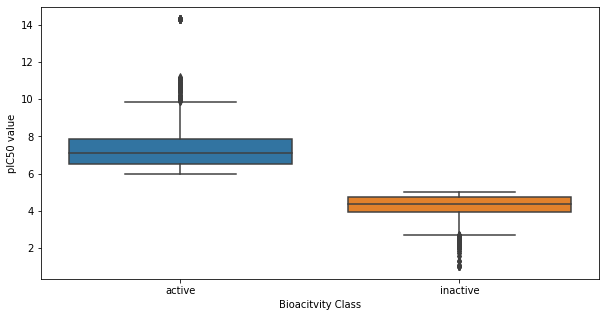

In [126]:
plt.figure(figsize = (10, 5))
sns.boxplot(x='class', y='pIC50', data=df8)
plt.xlabel('Bioacitvity Class')
plt.ylabel('pIC50 value')
plt.savefig(r'Graphs\Box Plot pIC50')
plt.show()

In [128]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


#### MW

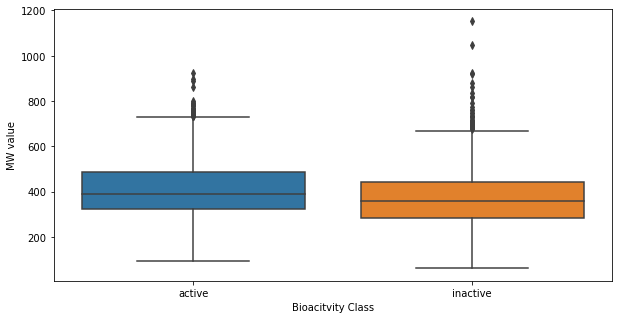

In [129]:
plt.figure(figsize = (10, 5))
sns.boxplot(x='class', y='MW', data=df8)
plt.xlabel('Bioacitvity Class')
plt.ylabel('MW value')
plt.savefig(r'Graphs\Box Plot MW')
plt.show()

In [130]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2762601.5,3.758496e-28,0.05,Different distribution (reject H0)


#### LogP

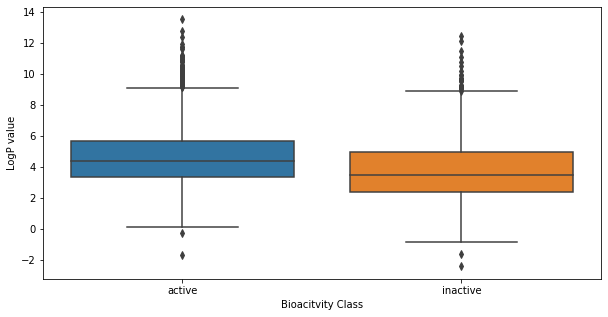

In [131]:
plt.figure(figsize = (10, 5))
sns.boxplot(x='class', y='LogP', data=df8)
plt.xlabel('Bioacitvity Class')
plt.ylabel('LogP value')
plt.savefig(r'Graphs\Box Plot LogP')
plt.show()

In [132]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2463917.0,1.084341e-60,0.05,Different distribution (reject H0)


#### NumHDonors

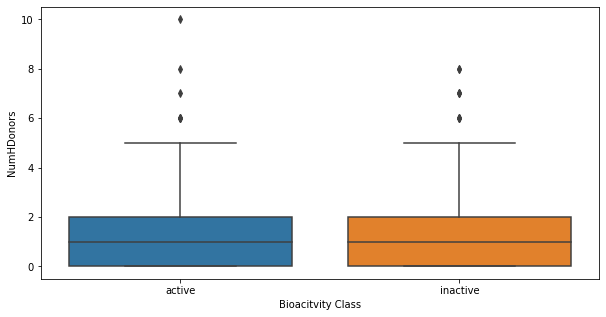

In [133]:
plt.figure(figsize = (10, 5))
sns.boxplot(x='class', y='NumHDonors', data=df8)
plt.xlabel('Bioacitvity Class')
plt.ylabel('NumHDonors')
plt.savefig(r'Graphs\Box Plot NumHDonors')
plt.show()

In [134]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3070810.0,1.031516e-08,0.05,Different distribution (reject H0)


#### NumHAcceptors

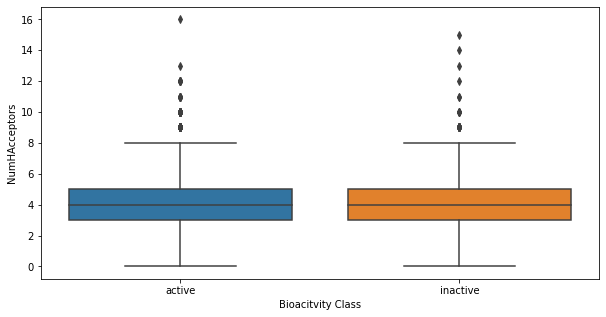

In [135]:
plt.figure(figsize = (10, 5))
sns.boxplot(x='class', y='NumHAcceptors', data=df8)
plt.xlabel('Bioacitvity Class')
plt.ylabel('NumHAcceptors')
plt.savefig(r'Graphs\Box Plot NumHAcceptors')
plt.show()

In [136]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,3315951.5,0.197804,0.05,Same distribution (fail to reject H0)


## Interpretation of Statistical Results
#### pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values 
- IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to 
- pIC50 > 6 = Actives and pIC50 < 5 = Inactives were used to define actives and inactives.

#### Lipinski's descriptors
3 of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

In [137]:
df8.to_csv('AChE_Bioactivity_data_5.csv', index=False)

In [138]:
df7

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6942,CHEMBL95,active,Nc1c2c(nc3ccccc13)CCCC2,198.269,2.6958,1.0,2.0,6.602060
6943,CHEMBL502,active,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,379.500,4.3611,0.0,4.0,7.522879
6944,CHEMBL3085398,inactive,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,424.493,5.1878,4.0,6.0,4.537902
6945,CHEMBL253998,active,CC(C)=CCc1c(O)cc(O)c2c1O[C@H](c1ccccc1)CC2=O,324.376,4.3130,2.0,4.0,8.193820


# <b>Computing Molecular Descriptors</b>

<b>Molecular Descriptors are Quantitive Description of the Compounds, can be defined as mathematical representations of molecules’ properties that are generated by algorithms. The numerical values of molecular descriptors are used to quantitatively describe the physical and chemical information of the molecule</b>

##### <b>Fingerprint</b> is the Molecular Descriptor that is used here, Specifically pubchem Fingerprints
##### <b> Molecular Fingerprint</b> are useful in predicting drug Binding Affinities or <b>Bioactivity</b>
##### Bit allocation in <a href = "https://drive.google.com/file/d/18N2AIfE2xcObN-LfJhNTz7Rx2eXEKqEh/view?usp=sharing" > Pubchem Fingerprints </a>
<img src = '#_Fingerprint.jpg' width="550" height="550">

#### <b>Software used : </b> <a href = 'http://www.yapcwsoft.com/dd/padeldescriptor/'> PaDEL-Descriptor
 </a>

In [64]:
# ! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip

In [139]:
df_final = pd.read_csv('AChE_Bioactivity_data_4.csv')
df_final

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6941,CHEMBL95,active,Nc1c2c(nc3ccccc13)CCCC2,198.269,2.6958,1.0,2.0,6.602060
6942,CHEMBL502,active,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,379.500,4.3611,0.0,4.0,7.522879
6943,CHEMBL3085398,inactive,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,424.493,5.1878,4.0,6.0,4.537902
6944,CHEMBL253998,active,CC(C)=CCc1c(O)cc(O)c2c1O[C@H](c1ccccc1)CC2=O,324.376,4.3130,2.0,4.0,8.193820


In [140]:
df_final_selected = df_final[['canonical_smiles', 'molecule_chembl_id']]
df_final_selected

,canonical_smiles,molecule_chembl_id
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478
...,...,...
6941,Nc1c2c(nc3ccccc13)CCCC2,CHEMBL95
6942,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,CHEMBL502
6943,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,CHEMBL3085398
6944,CC(C)=CCc1c(O)cc(O)c2c1O[C@H](c1ccccc1)CC2=O,CHEMBL253998


In [141]:
df_final_selected.to_csv('molecule.smi', sep='\t', index=False, header=False)

### PaDEL-Descriptor Software


<img src = '#_Soft_Padel.jpg' width = 2000 height = 2000>
<img src = '#_PubFing.jpg' width = 200 height = 200>

#### <b>Result obtained from the Software is Stored in <i>Fingerprints.csv</i></b>

In [142]:
df_fingerprints_name = pd.read_csv('Fingerprints.csv')
df_fingerprints_name

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336538,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL339995,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL341437,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130098,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,CHEMBL253998,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6942,CHEMBL502,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6943,CHEMBL3085398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6944,CHEMBL13045,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
df_fingerprints = df_fingerprints_name.drop('Name', axis=1)
df_fingerprints

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6942,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6943,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6944,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [144]:
df_mol_value = df_final['pIC50']
df_mol_value

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6941    6.602060
6942    7.522879
6943    4.537902
6944    8.193820
6945    7.096910
Name: pIC50, Length: 6946, dtype: float64

In [145]:
df_Bioactivity = pd.concat([df_fingerprints, df_mol_value], axis=1)
df_Bioactivity

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.602060
6942,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.522879
6943,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.537902
6944,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.193820


In [ ]:
df_Bioactivity.to_csv('AChE_Bioactivity_Data_Final.csv', index=False)